<a href="https://colab.research.google.com/github/danm00nster/PW_ML_PROJECT/blob/main/ML_Daniel_Kwiecinski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/danm00nster/PW_ML_PROJECT

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


fatal: destination path 'PW_ML_PROJECT' already exists and is not an empty directory.


In [2]:
AirlinesDF=pd.read_csv('PW_ML_PROJECT/Airlines.csv')
AirlinesDF=AirlinesDF[:500]

In [3]:
AirlinesDF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   Airline      500 non-null    object
 2   Flight       500 non-null    int64 
 3   AirportFrom  500 non-null    object
 4   AirportTo    500 non-null    object
 5   DayOfWeek    500 non-null    int64 
 6   Time         500 non-null    int64 
 7   Length       500 non-null    int64 
 8   Delay        500 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 35.3+ KB


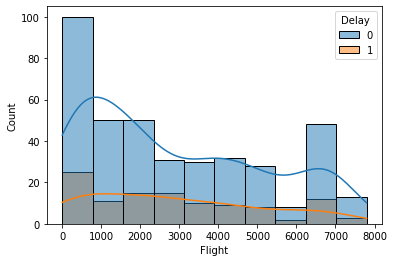

In [4]:
sns.histplot(data=AirlinesDF, x='Flight', hue='Delay', kde=True)

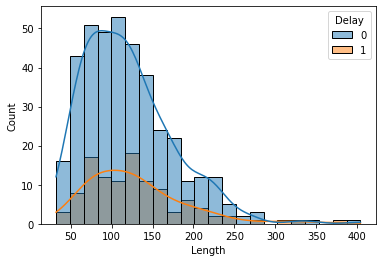

In [5]:
sns.histplot(data=AirlinesDF, x='Length', hue='Delay', kde=True)

Kolumna ID jest zbędna natomias kolumny AirportFrom i AirportTo powielają informację zawartą w kolumnie Flight

In [6]:
AirlinesDF.drop(columns=['id','AirportFrom','AirportTo'], inplace=True)

In [7]:
AirlinesDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Flight,500.0,2890.258,2261.061907,3.0,791.25,2320.0,4650.25,7799.0
DayOfWeek,500.0,3.000,0.000000,3.0,3.00,3.0,3.00,3.0
Time,500.0,336.488,67.783649,15.0,345.00,360.0,360.00,360.0
Length,500.0,121.762,56.658855,32.0,80.00,114.0,150.00,404.0
Delay,500.0,0.220,0.414661,0.0,0.00,0.0,0.00,1.0


In [8]:
AirlinesDF.head()


,Airline,Flight,DayOfWeek,Time,Length,Delay
0,CO,269,3,15,205,1
1,US,1558,3,15,222,1
2,AA,2400,3,20,165,1
3,AA,2466,3,20,195,1
4,AS,108,3,30,202,0


In [9]:
for col in ['Airline','Flight', 'DayOfWeek', 'Time', 'Length']:
    AirlinesDF[col] = AirlinesDF[col].astype('category')

In [10]:
AirlinesDF=pd.get_dummies(AirlinesDF,columns=['Airline'],drop_first=False)

In [11]:
AirlinesDF.info()
AirlinesDF.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Flight      500 non-null    category
 1   DayOfWeek   500 non-null    category
 2   Time        500 non-null    category
 3   Length      500 non-null    category
 4   Delay       500 non-null    int64   
 5   Airline_9E  500 non-null    uint8   
 6   Airline_AA  500 non-null    uint8   
 7   Airline_AS  500 non-null    uint8   
 8   Airline_B6  500 non-null    uint8   
 9   Airline_CO  500 non-null    uint8   
 10  Airline_DL  500 non-null    uint8   
 11  Airline_EV  500 non-null    uint8   
 12  Airline_F9  500 non-null    uint8   
 13  Airline_FL  500 non-null    uint8   
 14  Airline_HA  500 non-null    uint8   
 15  Airline_MQ  500 non-null    uint8   
 16  Airline_OH  500 non-null    uint8   
 17  Airline_OO  500 non-null    uint8   
 18  Airline_UA  500 non-null    uint8   
 19  Airline_

Index(['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay', 'Airline_9E',
       'Airline_AA', 'Airline_AS', 'Airline_B6', 'Airline_CO', 'Airline_DL',
       'Airline_EV', 'Airline_F9', 'Airline_FL', 'Airline_HA', 'Airline_MQ',
       'Airline_OH', 'Airline_OO', 'Airline_UA', 'Airline_US', 'Airline_WN',
       'Airline_XE', 'Airline_YV'],
      dtype='object')

In [12]:
y=AirlinesDF.pop("Delay")
for col in AirlinesDF.columns:
    AirlinesDF[col] = AirlinesDF[col].astype('category')

In [13]:
X=AirlinesDF


In [14]:
X.describe().T


,count,unique,top,freq
Flight,500,491,377,2
DayOfWeek,500,1,3,500
Time,500,44,360,315
Length,500,163,120,16
Airline_9E,500,2,0,461
Airline_AA,500,2,0,459
Airline_AS,500,2,0,490
Airline_B6,500,2,0,479
Airline_CO,500,2,0,476
Airline_DL,500,2,0,435


In [15]:
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Flight      500 non-null    category
 1   DayOfWeek   500 non-null    category
 2   Time        500 non-null    category
 3   Length      500 non-null    category
 4   Airline_9E  500 non-null    category
 5   Airline_AA  500 non-null    category
 6   Airline_AS  500 non-null    category
 7   Airline_B6  500 non-null    category
 8   Airline_CO  500 non-null    category
 9   Airline_DL  500 non-null    category
 10  Airline_EV  500 non-null    category
 11  Airline_F9  500 non-null    category
 12  Airline_FL  500 non-null    category
 13  Airline_HA  500 non-null    category
 14  Airline_MQ  500 non-null    category
 15  Airline_OH  500 non-null    category
 16  Airline_OO  500 non-null    category
 17  Airline_UA  500 non-null    category
 18  Airline_US  500 non-null    category
 19  Airline_

In [16]:
X.head()

,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
0,269,3,15,205,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1558,3,15,222,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2400,3,20,165,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2466,3,20,195,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,108,3,30,202,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
y_train.value_counts()

0    292
1     83
Name: Delay, dtype: int64

In [18]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [19]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

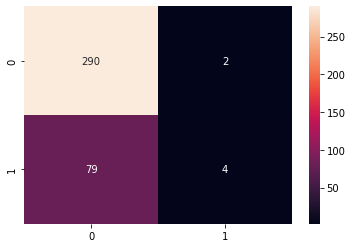

In [20]:
cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)

precision_train = precision_score(y_train, y_pred_train, average = 'weighted')
recall_train = recall_score(y_train, y_pred_train, average= 'weighted')
f1_train = f1_score(y_train,y_pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.784
Precision: 0.7595158084914181
Recall: 0.784
F1score: 0.7031427357255775


In [22]:
from sklearn.preprocessing import Normalizer, StandardScaler
normalizer = Normalizer()
standarizer = StandardScaler()
preprocessor = standarizer

def preprocess_data(X, preprocessor=None):
    if preprocessor is not None:
        preprocessor.fit(X)
        X_preprocessed = X.copy()
        X_preprocessed[:] = preprocessor.transform(X.values)
        X = X_preprocessed
    return X

X = preprocess_data(X, standarizer)
X.describe()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,Flight,DayOfWeek,Time,Length,Airline_9E,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,...,Airline_FL,Airline_HA,Airline_MQ,Airline_OH,Airline_OO,Airline_UA,Airline_US,Airline_WN,Airline_XE,Airline_YV
count,5.000000e+02,500.0,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000
mean,7.815970e-17,0.0,2.842171e-17,-1.421085e-17,5.684342e-17,2.842171e-17,2.842171e-17,3.197442e-17,-6.394885e-17,1.065814e-17,...,8.526513e-17,-1.421085e-17,0.000000,2.486900e-17,-2.842171e-17,2.842171e-17,-6.394885e-17,1.421085e-17,7.105427e-18,0.000000
std,1.001002e+00,0.0,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,...,1.001002e+00,1.001002e+00,1.001002,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002
min,-1.278227e+00,0.0,-4.747605e+00,-1.585840e+00,-2.908586e-01,-2.988722e-01,-1.428571e-01,-2.093832e-01,-2.245444e-01,-3.865557e-01,...,-1.932470e-01,-1.275153e-01,-0.318311,-1.758631e-01,-3.727629e-01,-2.526456e-01,-2.743516e-01,-2.041241e-01,-1.818182e-01,-0.063372
25%,-9.292581e-01,0.0,1.257018e-01,-7.378163e-01,-2.908586e-01,-2.988722e-01,-1.428571e-01,-2.093832e-01,-2.245444e-01,-3.865557e-01,...,-1.932470e-01,-1.275153e-01,-0.318311,-1.758631e-01,-3.727629e-01,-2.526456e-01,-2.743516e-01,-2.041241e-01,-1.818182e-01,-0.063372
50%,-2.524606e-01,0.0,3.472157e-01,-1.371326e-01,-2.908586e-01,-2.988722e-01,-1.428571e-01,-2.093832e-01,-2.245444e-01,-3.865557e-01,...,-1.932470e-01,-1.275153e-01,-0.318311,-1.758631e-01,-3.727629e-01,-2.526456e-01,-2.743516e-01,-2.041241e-01,-1.818182e-01,-0.063372
75%,7.791713e-01,0.0,3.472157e-01,4.988855e-01,-2.908586e-01,-2.988722e-01,-1.428571e-01,-2.093832e-01,-2.245444e-01,-3.865557e-01,...,-1.932470e-01,-1.275153e-01,-0.318311,-1.758631e-01,-3.727629e-01,-2.526456e-01,-2.743516e-01,-2.041241e-01,-1.818182e-01,-0.063372
max,2.173164e+00,0.0,3.472157e-01,4.986346e+00,3.438097e+00,3.345911e+00,7.000000e+00,4.775932e+00,4.453463e+00,2.586949e+00,...,5.174725e+00,7.842194e+00,3.141586,5.686241e+00,2.682671e+00,3.958114e+00,3.644957e+00,4.898979e+00,5.500000e+00,15.779734


In [23]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [24]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [25]:
ccuracy_train = accuracy_score(y_train, y_pred_train)

precision_train = precision_score(y_train, y_pred_train, average = 'weighted')
recall_train = recall_score(y_train, y_pred_train, average= 'weighted')
f1_train = f1_score(y_train,y_pred_train,average='weighted')

print(f'Accuracy: {accuracy_train}')
print(f'Precision: {precision_train}')
print(f'Recall: {recall_train}')
print(f'F1score: {f1_train}')

Accuracy: 0.784
Precision: 0.7595158084914181
Recall: 0.784
F1score: 0.7031427357255775


In [26]:
from sklearn.model_selection import GridSearchCV
svm = SVC(kernel='rbf')
parameters = {'gamma':[0.001, 0.1, 1],
              'C' : [0.1, 1, 10],
              'kernel': ['poly','rbf']}
searcher = GridSearchCV(svm, parameters, scoring  = 'f1_macro')
searcher.fit(X_train, y_train)
pred = searcher.predict(X_test)
pred_train = searcher.predict(X_train)
#Accuracy_test
print(accuracy_score(y_test, pred))
#Accuracy_train
print(accuracy_score(y_train, pred_train))
# Report the best parameters
print("Best CV params", searcher.best_params_)

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()